# The Expectation Maximization Algorithm

Here we show the EM Algorithm in a simple unoptimized format for the sake of clarity.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%matplotlib inline

### Create data

$a$ and $b$ are two normal distributions. $d$ is the union of the two sets. So, $d$, is a multi-modal distribution. In this case we know there are two modes and we know the means, but if we just had $d$ we would not. From $d$ we seek to find seek to find the maximum liklihood of each each distribution. That is we want to find the mean of each distribution.  

In [7]:
a = np.random.normal(1, 2, 50)
b = np.random.normal(4, 1, 50)
d = np.concatenate((a, b))

### Plot the data

Notice two modes of this distribution.

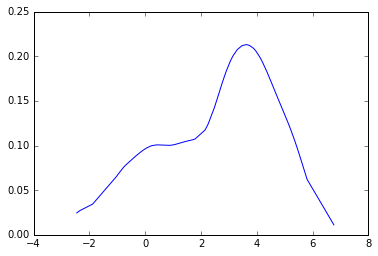

In [8]:
density = gaussian_kde(d[d.argsort()])
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(d[d.argsort()],density(d[d.argsort()]))

Here $mus$ is an array of the unknown means, $\mu$. $sds$ is an array of the unknown standard deviations, $\sigma$. We create a DataFrame to hold the data and the $z$s which are the probabilities that each record was derived from either of two distributions.


In [11]:
mus = np.array([1., 2.])
sds = np.array([1., 1.])
n_dists = range(2)

df = pd.DataFrame({'d':d})

Below is an iteration over each epoch of the EM Algorithm. If you look at $df$ below you will see that the column $d$ holds the data. $zm0$ and $zm1$ are the probabilities that an individual data point was generated from either the first or second distribution. This is the expectation step, which we may write as

$$E[z_{ij}] = \frac{p(x_i|\mu_j)}{\Sigma_k p(x_i|\mu_k)}$$.

Because we assume a normal distribution, this is equivilant to

$$\frac{exp(-(x_i-\mu_j)^2/2\sigma_j^2)}{\Sigma_k exp(-(x_i-\mu_k)^2/2\sigma_k^2)}$$.

The important thing to note here is that this gives a probability distribution over the number of unknown distributions for each record, i.e. each record gets two values $zm0$ and $zm1$. Likewise for $zsd0$ and $zsd1$, which are the expectations for the standard deviations. 

The next step is the maximization, the maximum likelihood of the mean for each unknown distribution. This may be written as

$$\mu_j = \frac{\Sigma_i E[z_{ij}] x_i}{\Sigma_i E[z_{ij}]}$$.

For a normal distribution the mean is the average. This is just a weighted mean by its expectations.

The first part of the loop below updates the means at each epoch. The second part updates the standard deviation of the unknown distributions. We leave it as an exercise to write this out in notation, but it is in code below. It is common to assume equal standard deviation between the two distributions. We add this here to show that with minor modifications we may learn these parameters as well.

After 15 epochs we see that the means and standard deviations are very similar to $a$ and $b$ above. These values were unknown in $d$ and the EM Algorithm works to elucidate these values.




In [12]:
for e in range(15):
    # for means
    e_normalization = np.sum((sp.stats.norm.pdf(df.d, loc=mus[0], scale=sds[0]),
                              sp.stats.norm.pdf(df.d, loc=mus[1], scale=sds[1])), axis=0)
                   
    for idx in n_dists:
        df['zm%d' % idx] = sp.stats.norm.pdf(df.d, loc=mus[idx], scale=sds[idx])/e_normalization
        
    m_normalization = df[['zm0', 'zm1']].sum()

    for idx in n_dists:
        zidx = 'zm%d' % idx
        mus[idx] = (df.d * df[zidx]).sum()/m_normalization[zidx]
    print('means: ' + str(mus))
    
    # for variance
    e_normalization = np.sum((sp.stats.norm.pdf(df.d, loc=mus[0], scale=sds[0]),
                              sp.stats.norm.pdf(df.d, loc=mus[1], scale=sds[1])), axis=0)
                   
    for idx in n_dists:
        df['zsd%d' % idx] = sp.stats.norm.pdf(df.d, loc=mus[idx], scale=sds[idx])/e_normalization
        
    m_normalization = df[['zsd0', 'zsd1']].sum()

    for idx in n_dists:
        zidx = 'zsd%d' % idx
        sds[idx] = np.sqrt((((df.d-mus[idx])**2) * df[zidx]).sum()/m_normalization[zidx])
    print('sd: ' + str(sds))
    print('-------------------------')

means: [ 0.58116983  3.55889202]
sd: [ 1.36242441  1.10732465]
-------------------------
means: [ 0.48989364  3.89384042]
sd: [ 1.50020701  1.04975235]
-------------------------
means: [ 0.60202545  3.97344121]
sd: [ 1.58413547  1.02466779]
-------------------------
means: [ 0.71367407  4.00993976]
sd: [ 1.64173818  1.01368293]
-------------------------
means: [ 0.79735961  4.03031702]
sd: [ 1.68219482  1.0084108 ]
-------------------------
means: [ 0.85557699  4.04161913]
sd: [ 1.7103639   1.00570173]
-------------------------
means: [ 0.89471278  4.04765121]
sd: [ 1.72967639  1.00426047]
-------------------------
means: [ 0.92052797  4.05074853]
sd: [ 1.74272969  1.00348736]
-------------------------
means: [ 0.93737645  4.05228404]
sd: [ 1.75145403  1.00307671]
-------------------------
means: [ 0.94831047  4.0530201 ]
sd: [ 1.7572366   1.00286326]
-------------------------
means: [ 0.95538668  4.05336031]
sd: [ 1.76104614  1.00275567]
-------------------------
means: [ 0.95996111  

In [13]:
# view the data and expectations (z)
df

,d,zm0,zm1,zsd0,zsd1
0,-1.019771,0.999991,9.132884e-06,0.999991,9.139808e-06
1,1.535665,0.926540,7.346045e-02,0.926556,7.344411e-02
2,-0.801204,0.999976,2.356338e-05,0.999976,2.357923e-05
3,5.368306,0.056551,9.434491e-01,0.056644,9.433564e-01
4,1.051883,0.980426,1.957422e-02,0.980427,1.957324e-02
5,3.091681,0.303430,6.965703e-01,0.303609,6.963911e-01
6,0.215475,0.998733,1.266511e-03,0.998733,1.266860e-03
7,4.903610,0.063366,9.366342e-01,0.063458,9.365418e-01
8,1.720642,0.885858,1.141421e-01,0.885890,1.141105e-01
9,1.406466,0.947228,5.277185e-02,0.947238,5.276237e-02
